## Projet de machine learning -- Code sur R

Tout d'abord, on va importer les librarires, importer et mettre en forme les données sur R

In [31]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet)
library(ggfortify)
library(pROC)
library(ROCR)
library(caret)

ERROR: Error in library(caret): aucun package nommé 'caret' n'est trouvé


In [8]:
data <- read.csv("healthcare_synthetic_data.csv")

head(data)
summary(data)

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
2,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
3,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
4,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
5,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0
6,PID-00006,52,0,159.6,60.3,23.7,134,92,225,155,48,103,0,0,1,1,4,8,0


  Patient_ID             Age            Gender         Height_cm    
 Length:15000       Min.   :25.00   Min.   :0.0000   Min.   :138.5  
 Class :character   1st Qu.:46.00   1st Qu.:0.0000   1st Qu.:158.5  
 Mode  :character   Median :55.00   Median :0.0000   Median :164.7  
                    Mean   :54.54   Mean   :0.4919   Mean   :165.3  
                    3rd Qu.:63.00   3rd Qu.:1.0000   3rd Qu.:172.0  
                    Max.   :85.00   Max.   :1.0000   Max.   :198.1  
   Weight_kg           BMI         Systolic_BP     Diastolic_BP   
 Min.   : 33.70   Min.   :14.50   Min.   : 90.0   Min.   : 60.00  
 1st Qu.: 65.20   1st Qu.:24.50   1st Qu.:127.0   1st Qu.: 85.00  
 Median : 73.90   Median :27.20   Median :135.0   Median : 91.00  
 Mean   : 75.25   Mean   :27.45   Mean   :135.1   Mean   : 90.54  
 3rd Qu.: 83.90   3rd Qu.:30.00   3rd Qu.:143.0   3rd Qu.: 96.00  
 Max.   :150.10   Max.   :46.10   Max.   :182.0   Max.   :120.00  
 Cholesterol_Total Cholesterol_LDL Cholesterol_H

On convertit les variables quanlitatives en facteurs

In [ ]:
data[,"Smoking_Status"] <- as.factor(data[, "Smoking_Status"])
data[,"Alcohol_Consumption"] <- as.factor(data[, "Alcohol_Consumption"])
data[,"Physical_Activity_Level"] <- as.factor(data[, "Physical_Activity_Level"])
data[,"Family_History"] <- as.factor(data[, "Family_History"])
data[,"Heart_Disease_Risk"] <- as.factor(data[, "Heart_Disease_Risk"])
data[,"Gender"] <- as.factor(data[, "Gender"])
summary(data)

  Patient_ID             Age        Gender     Height_cm       Weight_kg     
 Length:15000       Min.   :25.00   0:7622   Min.   :138.5   Min.   : 33.70  
 Class :character   1st Qu.:46.00   1:7378   1st Qu.:158.5   1st Qu.: 65.20  
 Mode  :character   Median :55.00            Median :164.7   Median : 73.90  
                    Mean   :54.54            Mean   :165.3   Mean   : 75.25  
                    3rd Qu.:63.00            3rd Qu.:172.0   3rd Qu.: 83.90  
                    Max.   :85.00            Max.   :198.1   Max.   :150.10  
      BMI         Systolic_BP     Diastolic_BP    Cholesterol_Total
 Min.   :14.50   Min.   : 90.0   Min.   : 60.00   Min.   :127.0    
 1st Qu.:24.50   1st Qu.:127.0   1st Qu.: 85.00   1st Qu.:201.0    
 Median :27.20   Median :135.0   Median : 91.00   Median :216.0    
 Mean   :27.45   Mean   :135.1   Mean   : 90.54   Mean   :216.2    
 3rd Qu.:30.00   3rd Qu.:143.0   3rd Qu.: 96.00   3rd Qu.:231.0    
 Max.   :46.10   Max.   :182.0   Max.   :120.0

We are going to do a uni-dimensional analysis of the data. This means that we will be plotting graph of the different variable and look at their shape. We have a preference for data that look like gaussian data. We can do transformations of data to give it the shape of gaussian data. 

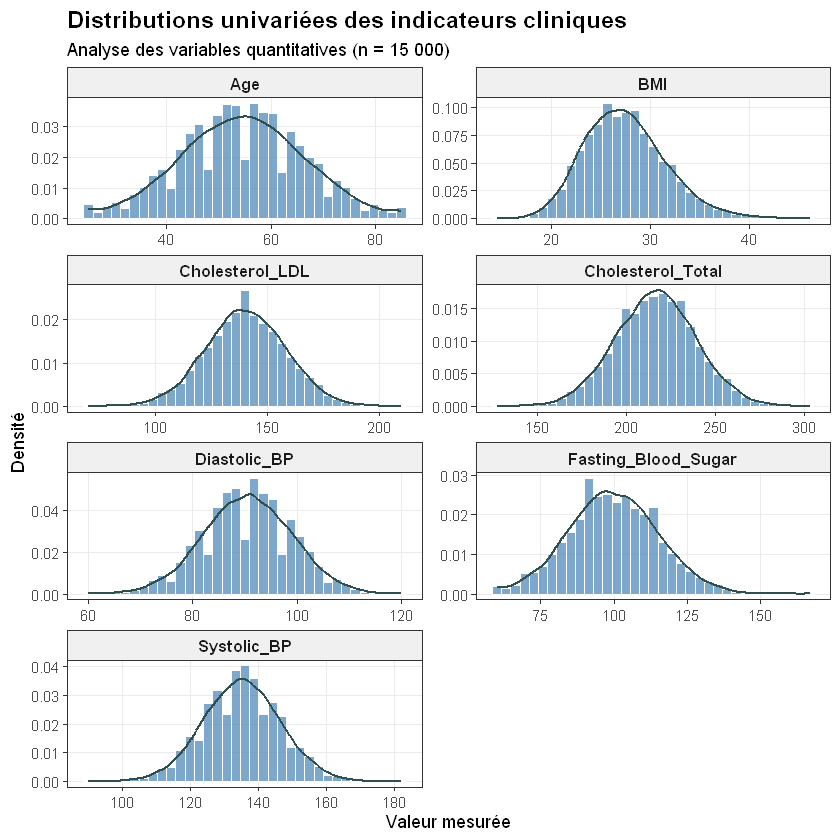

In [ ]:
cols_quantitatives <- c("Age", "BMI", "Systolic_BP", "Diastolic_BP", 
                        "Cholesterol_Total", "Cholesterol_LDL", "Fasting_Blood_Sugar")

data_long <- data %>%
  select(all_of(cols_quantitatives)) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Valeur")

# 2. Création du graphique
p <- ggplot(data_long, aes(x = Valeur)) +
  # Histogramme avec une couleur sobre (Steelblue) et bordures blanches
  geom_histogram(aes(y = ..density..), bins = 35, fill = "#4682B4", color = "white", alpha = 0.7) +
  # Courbe de densité plus fine et sombre
  geom_density(color = "#2f4f4f", size = 0.8) +
  # Grilles séparées par variable
  
  facet_wrap(~ Variable, scales = "free", ncol = 2) + 
  labs(title = "Distributions univariées des indicateurs cliniques",
       subtitle = "Analyse des variables quantitatives (n = 15 000)",
       x = "Valeur mesurée",
       y = "Densité") +
  # Thème très épuré
  theme_bw() + 
  theme(
    strip.background = element_rect(fill = "#F0F0F0"), # Fond des titres de facettes gris clair
    strip.text = element_text(face = "bold", size = 10),
    panel.grid.minor = element_blank(),
    plot.title = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 11)
  )

# 3. Affichage
print(p)

Les transformations de variables qu'il faut faire :

BMI et Fasting_Blood_Sugar ont l'air d'être un peu à droite... Il faudrait prendre le log pour passer d'une distrib exponentielle a une distrib normale

On va essayer de faire cela


In [29]:
data <- data %>%
  mutate(
    Log_BMI = log(BMI),
    Log_Fasting_BS = log(Fasting_Blood_Sugar)
  )

On affiche maintenant les deux nouvelles variables transformées

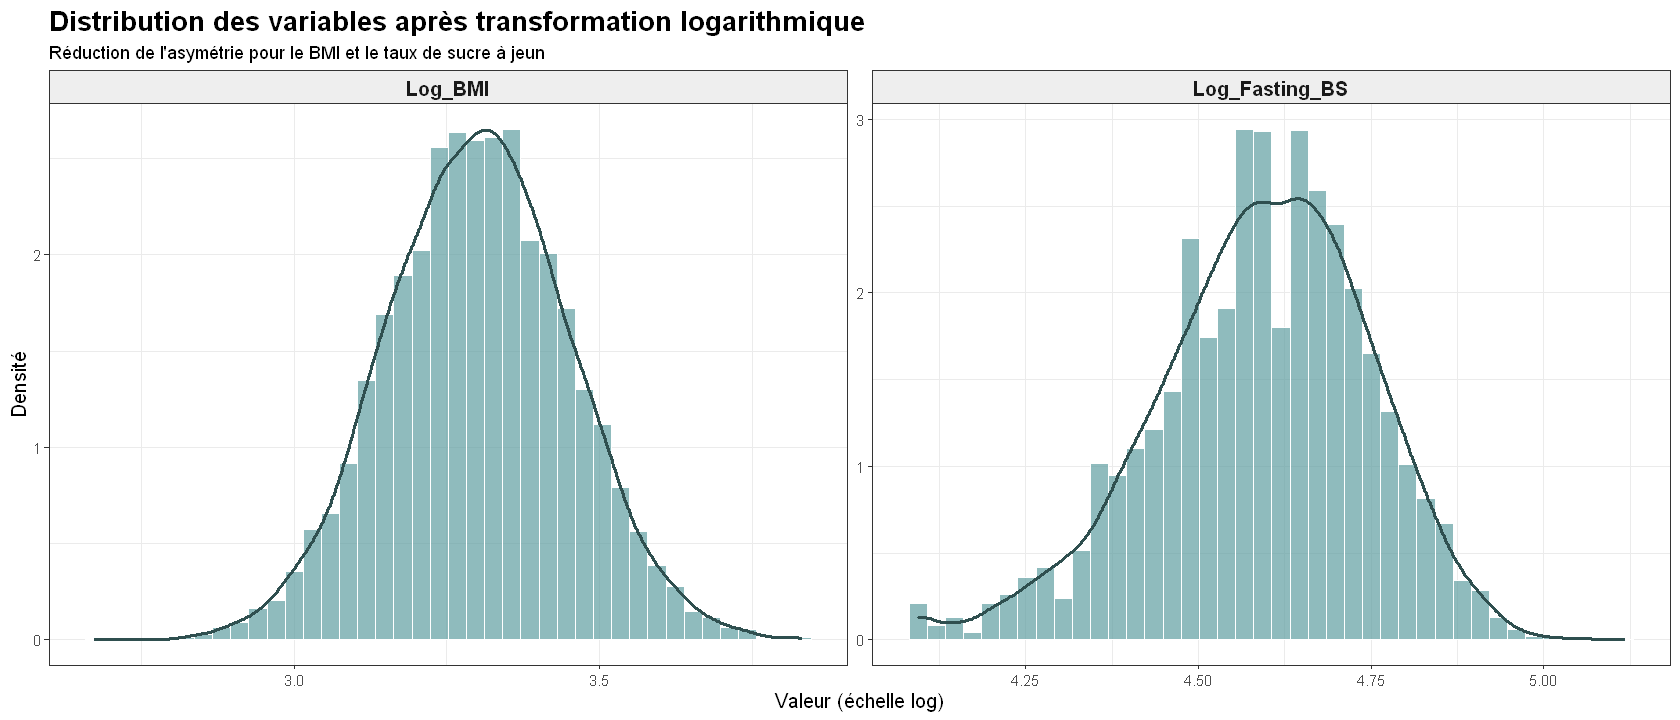

In [30]:
# 1. Sélection des nouvelles variables uniquement
cols_log <- c("Log_BMI", "Log_Fasting_BS")

data_log_long <- data %>%
  select(all_of(cols_log)) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Valeur")

# 2. Configuration de la taille dans le notebook VS Code
options(repr.plot.width = 14, repr.plot.height = 6)

# 3. Affichage
p_log <- ggplot(data_log_long, aes(x = Valeur)) +
  geom_histogram(aes(y = ..density..), bins = 40, fill = "#5F9EA0", color = "white", alpha = 0.7) +
  geom_density(color = "#2F4F4F", size = 1) +
  facet_wrap(~ Variable, scales = "free", ncol = 2) + 
  labs(title = "Distribution des variables après transformation logarithmique",
       subtitle = "Réduction de l'asymétrie pour le BMI et le taux de sucre à jeun",
       x = "Valeur (échelle log)",
       y = "Densité") +
  theme_bw() +
  theme(
    strip.background = element_rect(fill = "#EEEEEE"),
    strip.text = element_text(face = "bold", size = 12),
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12)
  )

print(p_log)

En ce qui concerne l'analyse exploratoire, nous préférons la faire en Python. Nous nous contentons ici de la transformation des données pour pouvoir poursuivre notre analyse que nous allons, elle, effectuer simultanément dans les deux langages.

Nous allons maintenant séparer nos données entre données d'entraînement et données de test.

# Fixer la graine (seed) pour la reproductibilité (crucial pour Git)
set.seed(42)

# Créer l'index pour 80% d'entraînement et 20% de test
# On stratifie sur Heart_Disease_Risk pour garder les mêmes proportions de classes
trainIndex <- createDataPartition(data$Heart_Disease_Risk, p = .8, 
                                  list = FALSE, 
                                  times = 1)

# Division
train_data <- data[trainIndex,]
test_data  <- data[-trainIndex,]

# Vérification des dimensions
print(dim(train_data))
print(dim(test_data))